# Import Libraries

In [18]:
import zipfile
import os
import PIL
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image, ImageOps

# Load Data

In [2]:
dataset_dir = 'dataset/rps-cv-images'

In [3]:
paper_dir = os.path.join(dataset_dir, 'paper')
rock_dir = os.path.join(dataset_dir, 'rock')
scissors_dir = os.path.join(dataset_dir, 'scissors')

In [4]:
paper_files = os.listdir(paper_dir)
rock_files = os.listdir(rock_dir)
scissors_files = os.listdir(scissors_dir)

In [5]:
print('Total paper images :', len(paper_files))
print('Total rock images :', len(rock_files))
print('Total scissors images :', len(scissors_files))

Total paper images : 712
Total rock images : 726
Total scissors images : 750


In [6]:
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

In [7]:
# Set up matplotlib fig

pic_index += 5

next_paper_pix = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-5:pic_index]]
next_rock_pix = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-5:pic_index]]
next_scissors_pix = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-5:pic_index]]

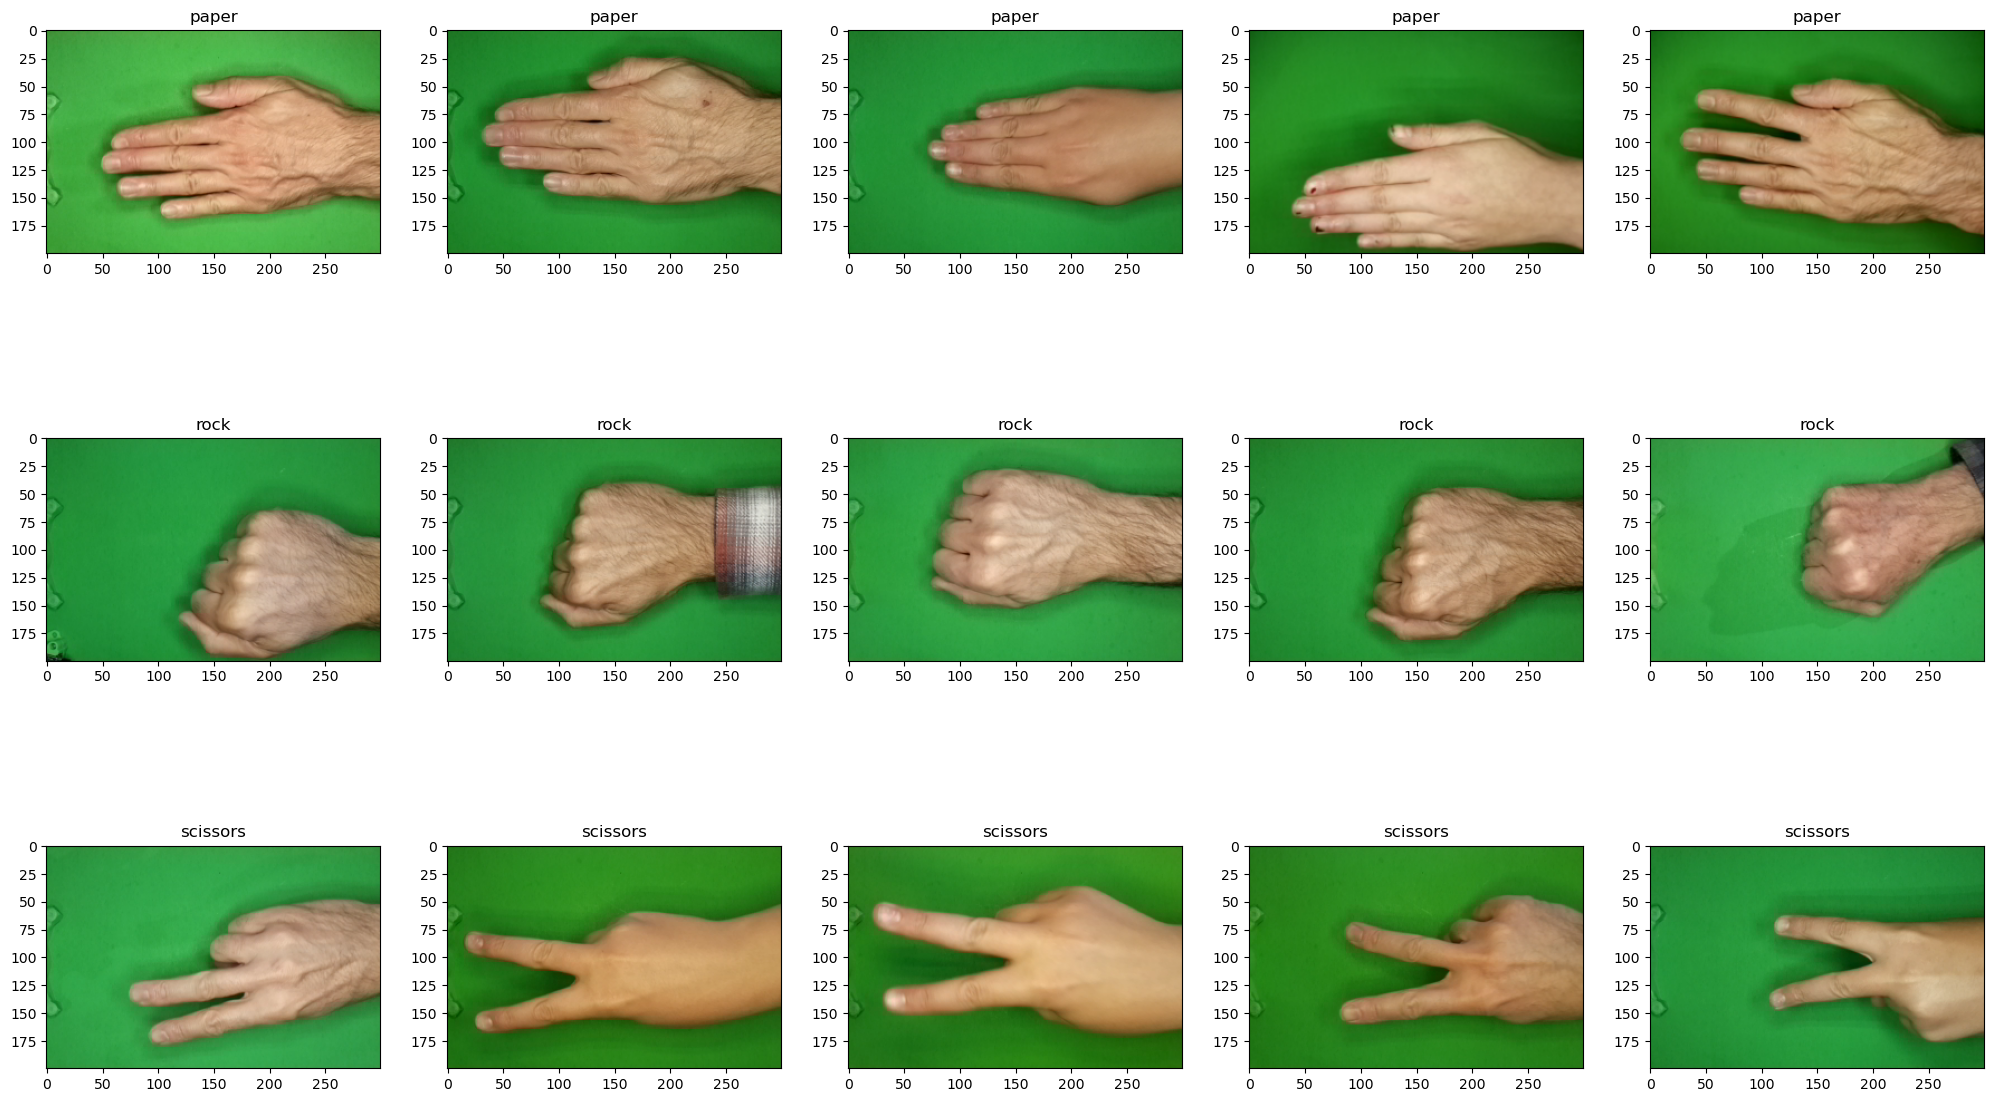

In [8]:
fig, axes = plt.subplots(3,5, figsize=(25, 15))
row = 0
col1 = 0
col2 = 0
col3 = 0

for i, img_path in enumerate(next_paper_pix+next_rock_pix+next_scissors_pix):
    if i < 5:
        img = plt.imread(img_path)
        axes[row][col1].imshow(img)
        axes[row][col1].set_title('paper')
        col1+=1
    elif i < 10 and i >= 5:
        row=1
        img = plt.imread(img_path)
        axes[row][col2].imshow(img)
        axes[row][col2].set_title('rock')
        col2+=1
    elif i < 15 and i >= 10:
        row=2
        img = plt.imread(img_path)
        axes[row][col3].imshow(img)
        axes[row][col3].set_title('scissors')
        col3+=1

# Data Augmentation

In [9]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

In [10]:
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150,150),
    class_mode = 'categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150,150),
    class_mode = 'categorical',
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


# Modelling

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(150,150,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

C:\Users\brian\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 165888)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 165888)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      42,467,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,676,355 (162.80 MB)

 Trainable params: 42,676,355 (162.80 MB)

 Non-trainable params: 0 (0.00 B)

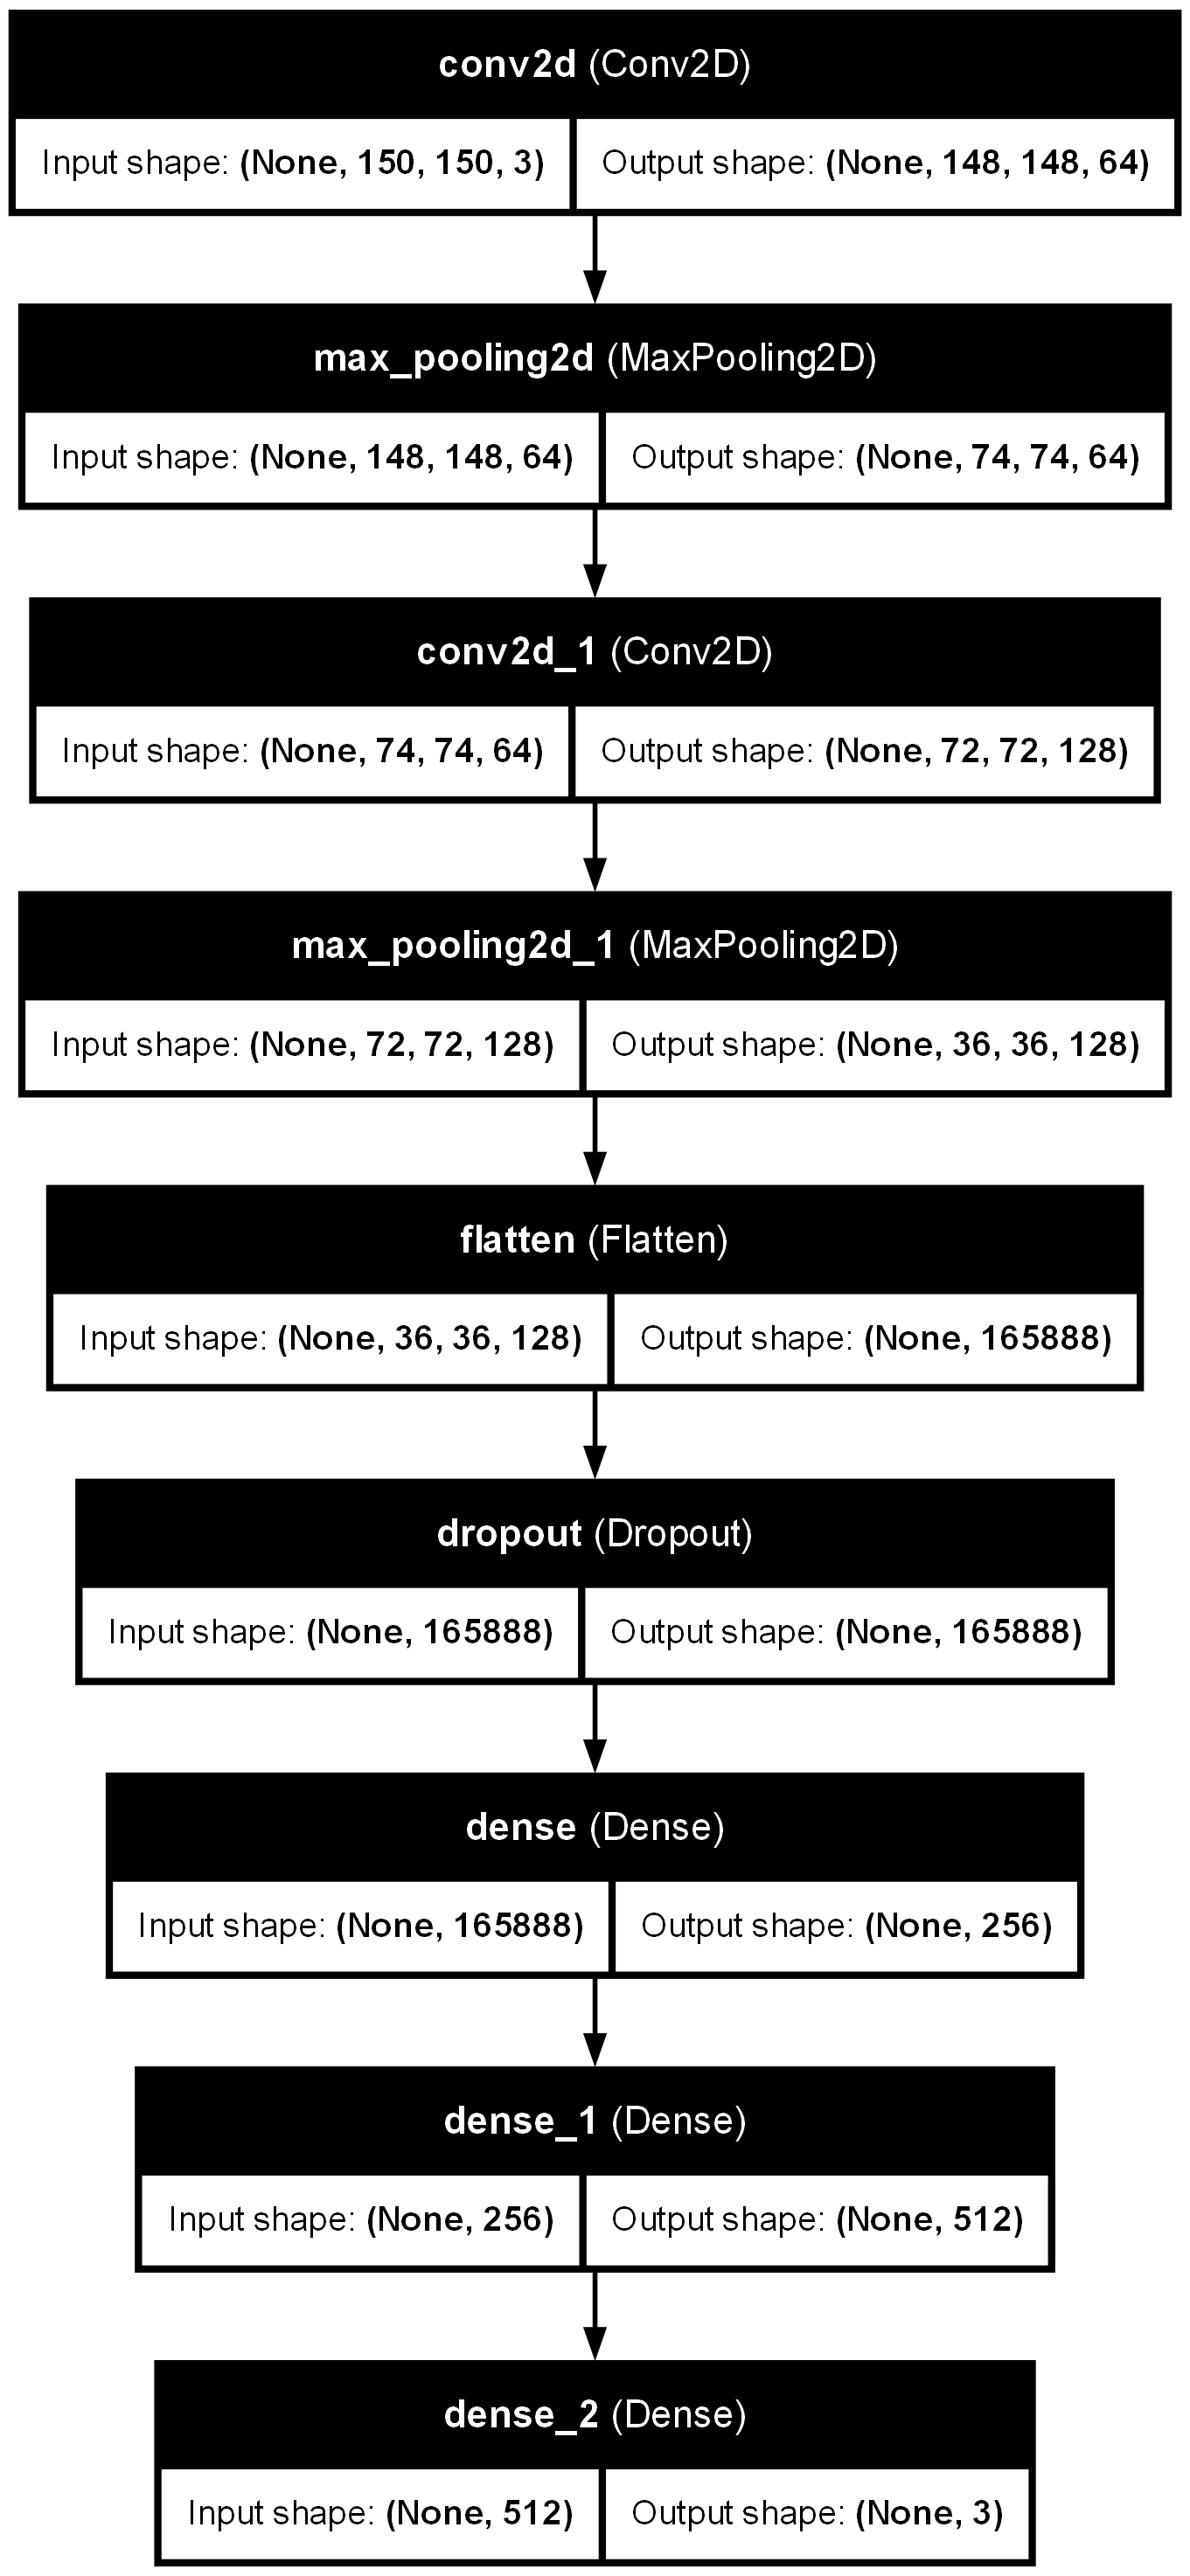

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [14]:
model.compile(metrics=['acc'], loss='categorical_crossentropy', optimizer='adam',)

history = model.fit(train_generator, epochs=10, validation_data=val_generator, shuffle=True)

Epoch 1/10


C:\Users\brian\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - acc: 0.5032 - loss: 1.4931 - val_acc: 0.8970 - val_loss: 0.3276
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - acc: 0.9055 - loss: 0.2731 - val_acc: 0.9428 - val_loss: 0.1643
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - acc: 0.9492 - loss: 0.1287 - val_acc: 0.9199 - val_loss: 0.2227
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - acc: 0.9417 - loss: 0.1517 - val_acc: 0.9611 - val_loss: 0.0730
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - acc: 0.9658 - loss: 0.0893 - val_acc: 0.9703 - val_loss: 0.0771
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - acc: 0.9660 - loss: 0.0915 - val_acc: 0.9497 - val_loss: 0.1284
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - acc: 0.9898 - loss: 0.0349 - val_acc: 0.9703 - val_loss: 0.0895
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - acc: 0.9942 - loss: 0.0154 - val_acc: 0.9725 - val_loss: 0.0863
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - acc: 0.9916 - loss: 0.0247 - va

# Evaluation

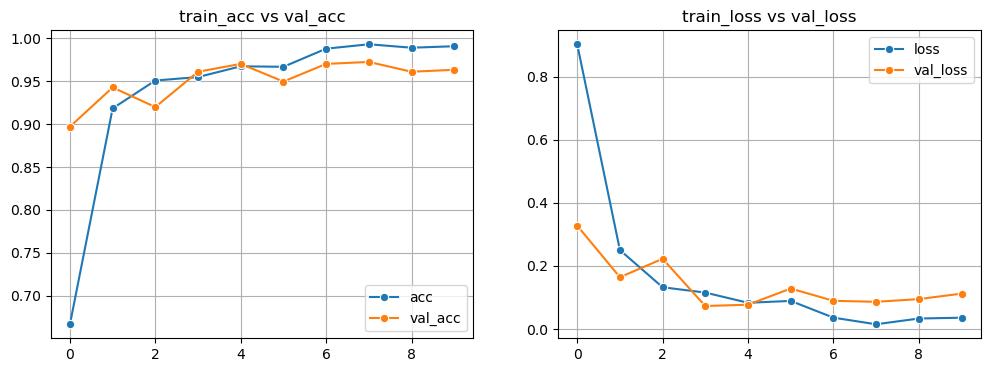

In [19]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(data=history.history['acc'], ax=axes[0], label='acc', marker='o')
sns.lineplot(data=history.history['val_acc'], ax=axes[0], label='val_acc', marker='o')

sns.lineplot(data=history.history['loss'], ax=axes[1], label='loss', marker='o')
sns.lineplot(data=history.history['val_loss'], ax=axes[1], label='val_loss', marker='o')

axes[0].set_title('train_acc vs val_acc')
axes[1].set_title('train_loss vs val_loss')

axes[0].grid(True)
axes[1].grid(True)

plt.legend()
plt.show()

In [20]:
val_loss, val_acc = model.evaluate(val_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - acc: 0.9693 - loss: 0.1057


In [23]:
print(f'val-loss : {val_lose}\n val-acc : {val_acc}')

val-loss : 0.11223140358924866
 val-acc : 0.9633867144584656


# Implementation

In [24]:
dict_class = val_generator.class_indices
print('Dictionary: {}'.format(dict_class))
class_names = list(dict_class.keys())  # storing class/breed names in a list
print('Class labels: {}'.format(class_names))

Dictionary: {'paper': 0, 'rock': 1, 'scissors': 2}
Class labels: ['paper', 'rock', 'scissors']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


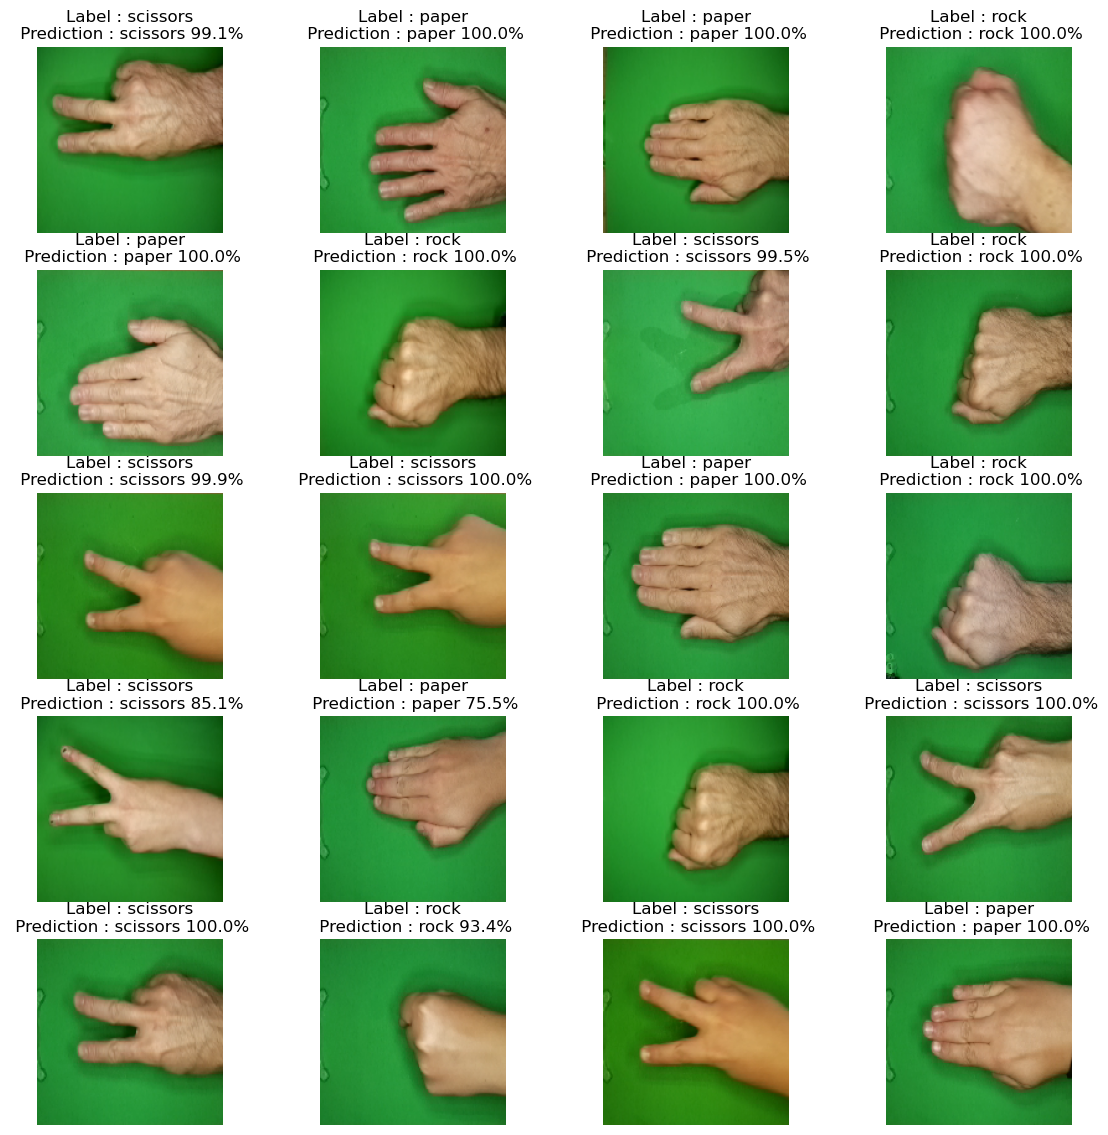

In [25]:
val_generator.reset()
img, label = next(val_generator)

prediction = model.predict(img)
test_pred_classes = np.argmax(prediction, axis=1)

plt.figure(figsize=(14,14))

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title("Label : {}\n Prediction : {} {:.1f}%".format(class_names[np.argmax(label[i])], class_names[test_pred_classes[i]], 100 * np.max(prediction[i])))
plt.show()